In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PotatoDataset",
    image_size=(256, 256),
    shuffle=True,
    verbose=True
)

Found 2152 files belonging to 3 classes.


In [86]:
dataset.class_names
classes = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Resize images

In [98]:
# Function to normalize images
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Divide by 255 to normalize
    return image, label

dataset = dataset.map(normalize_image)

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)
value-- tf.Tensor([1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 2 1 0 0 1 0 0 0 0], shape=(32,), dtype=int32)


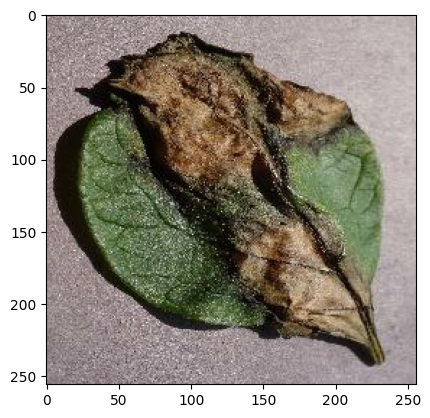

In [99]:
for img,j in dataset.take(1):
    print("Image batch shape:", img.shape)  # Should be (batch_size, height, width, channels)
    print("Label batch shape:", j.shape)
    print("value--", j)
    for k in range(1):
        plt.imshow(img[k].numpy())
    

Split dataset

In [53]:
len(dataset)

68

In [100]:
train_data = dataset.take(int(len(dataset)*0.8))
print("Lenght of train dataset is-",len(train_data))

Lenght of train dataset is- 54


In [101]:
remaining_data = dataset.skip(int(len(dataset)*0.8))

test_data = remaining_data.take(int(len(remaining_data)*0.5))
validation_data = remaining_data.skip(int(len(remaining_data)*0.5))

print("Lenght of test dataset is-",len(test_data))
print("Lenght of validation dataset is-",len(validation_data))

Lenght of test dataset is- 7
Lenght of validation dataset is- 7


In [108]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),

    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [109]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,509,955 (120.20 MB)

 Trainable params: 31,509,955 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [105]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)


Epoch 1/10


c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\Dipam1\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\Dipam1\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\Users\Dipam1\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Dipam1\AppData\Local\Temp\ipykernel_3468\2495074642.py", line 1, in <module>

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 371, in fit

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 132, in multi_step_on_iterator

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 113, in one_step_on_data

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 60, in train_step

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\trainers\compile_utils.py", line 691, in __call__

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\trainers\compile_utils.py", line 700, in call

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\losses\losses.py", line 33, in call

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\losses\losses.py", line 2246, in sparse_categorical_crossentropy

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\ops\nn.py", line 1963, in sparse_categorical_crossentropy

  File "c:\Users\Dipam1\envs\mlaiprojects\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 2 which is outside the valid range of [0, 1).  Label values: 1 0 0 1 0 1 2 1 2 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_14765]

Vizualizing my model

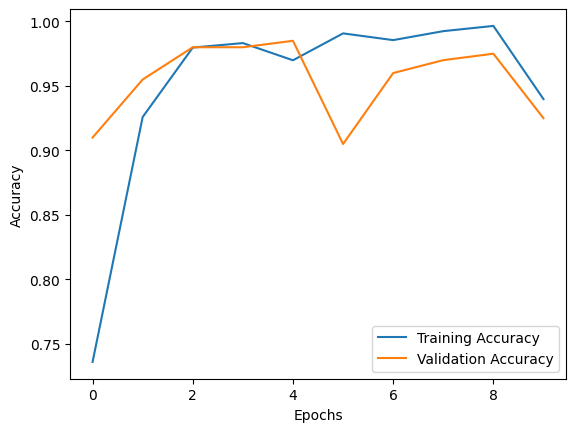

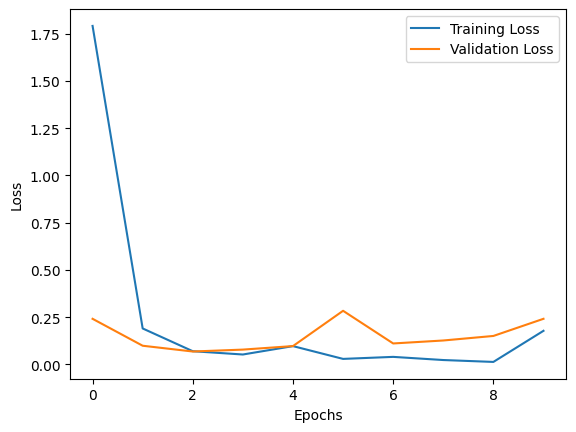

In [71]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [72]:
model.save("potato_disease_model.h5")  # Save the model in HDF5 format

In [89]:
predictions = model.predict(test_data)

# Use tf.argmax to get the predicted class indices
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Extract true labels from the test dataset
true_labels = []
for _, labels in test_data:
    true_labels.extend(labels.numpy())

true_labels = tf.convert_to_tensor(true_labels)

# Print some predictions vs. true labels for verification
for i in range(10):  # Adjust the range as needed
    print(f"True label: {true_labels[i]}, Predicted: {predicted_classes[i]}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step
True label: 1, Predicted: 1
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 1, Predicted: 0
True label: 1, Predicted: 1
True label: 0, Predicted: 0
True label: 1, Predicted: 0
True label: 2, Predicted: 1
True label: 0, Predicted: 1
True label: 1, Predicted: 0


first_class =  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Predicted label =  12


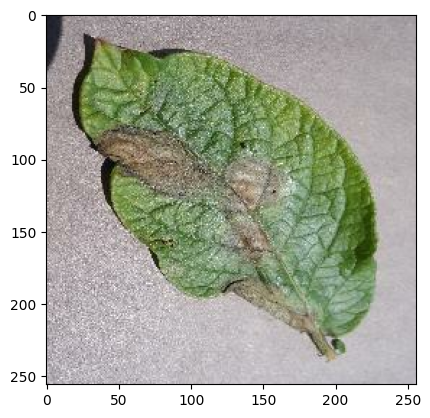

In [97]:
for img, label in test_data.take(1):
    first_image = img[0].numpy()
    first_class = label[0].numpy()

    plt.imshow(first_image)
    print("first_class = ", classes[first_class])

    predicted_img_cls = model.predict(img)
    print("Predicted label = ", np.argmax(predicted_img_cls))

In [87]:
from tensorflow.keras.preprocessing.image import img_to_array
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

predictions = model.predict(img_array)
predicted_class = tf.argmax(predictions[0])
print(f"Predicted class: {classes[predicted_class]}")


ValueError: Unsupported image shape: (32, 256, 256, 3)